- <b>Classification algorithms</b>

- <b>Submitted by Kaushik </b>
- <b>email- kumarkaushik1580@gmail.com</b>

# Artificial Neural Network
- <b>M=1, S=0 </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv("Train_Dataset-01.csv")
ds1 = pd.read_csv("Test_Dataset-01.csv")

In [3]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,NaN,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data preprocessing

In [4]:
ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
ds.drop(["id"],axis=1,inplace=True)
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,NaN,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
ds_null=ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

texture_mean               12
smoothness_mean             1
compactness_mean            6
symmetry_mean               1
fractal_dimension_mean      2
radius_se                  14
smoothness_se               3
compactness_se              2
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se       13
perimeter_worst             1
area_worst                 13
smoothness_worst            3
concavity_worst             6
concave points_worst        5
symmetry_worst              5
fractal_dimension_worst     3
dtype: int64

In [7]:
ds["texture_mean"].fillna(method='ffill',inplace=True)
ds["smoothness_mean"].fillna(method='ffill',inplace=True)
ds["compactness_mean"].fillna(method='ffill',inplace=True)
ds["symmetry_mean"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_mean"].fillna(method='ffill',inplace=True)
ds["radius_se"].fillna(method='ffill',inplace=True)
ds["smoothness_se"].fillna(method='ffill',inplace=True)
ds["compactness_se"].fillna(method='ffill',inplace=True)
ds["concavity_se"].fillna(method='ffill',inplace=True)
ds["concave points_se"].fillna(method='ffill',inplace=True)
ds["symmetry_se"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_se"].fillna(method='ffill',inplace=True)
ds["perimeter_worst"].fillna(method='ffill',inplace=True)
ds["area_worst"].fillna(method='ffill',inplace=True)
ds["smoothness_worst"].fillna(method='ffill',inplace=True)
ds["concavity_worst"].fillna(method='ffill',inplace=True)
ds["concave points_worst"].fillna(method='ffill',inplace=True)
ds["symmetry_worst"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_worst"].fillna(method='ffill',inplace=True)

In [8]:
ds.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['diagnosis']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['M' 'B']


In [11]:
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.14250,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Feature Engineering
## Outlier Detection and treatment

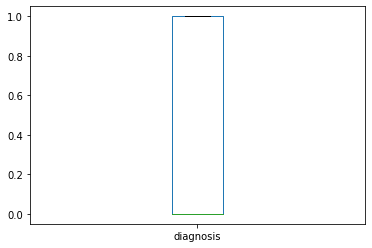

In [12]:
ds['diagnosis'].plot.box()

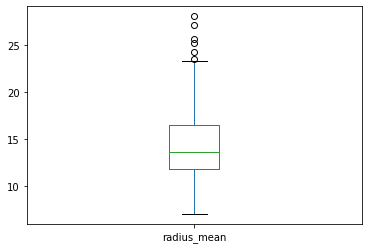

In [13]:
ds['radius_mean'].plot.box()

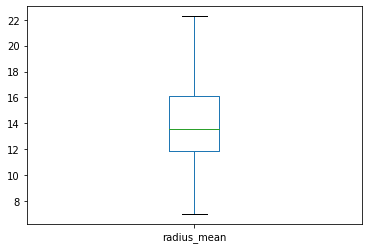

In [14]:
ds.loc[ds['radius_mean']>23,'radius_mean']=np.mean(ds['radius_mean'])
ds['radius_mean'].plot.box()

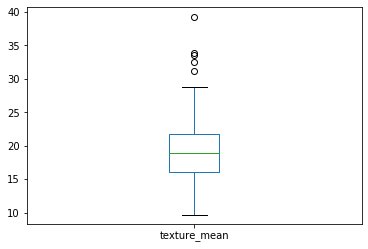

In [15]:
ds['texture_mean'].plot.box()

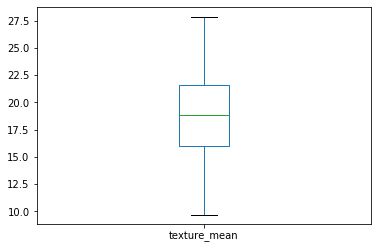

In [16]:
ds.loc[ds['texture_mean']>28,'texture_mean']=np.mean(ds['texture_mean'])
ds['texture_mean'].plot.box()

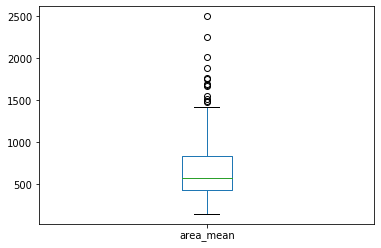

In [17]:
ds['area_mean'].plot.box()

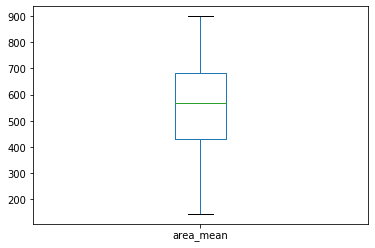

In [18]:
ds.loc[ds['area_mean']>900,'area_mean']=np.mean(ds['area_mean'])
ds['area_mean'].plot.box()

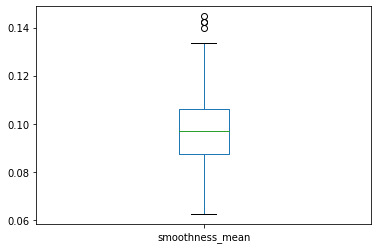

In [19]:
ds['smoothness_mean'].plot.box()

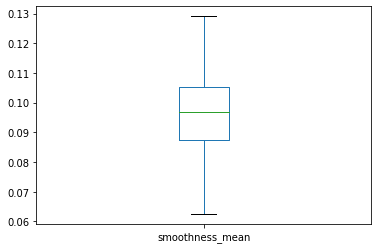

In [20]:
ds.loc[ds['smoothness_mean']>0.13,'smoothness_mean']=np.mean(ds['smoothness_mean'])
ds['smoothness_mean'].plot.box()

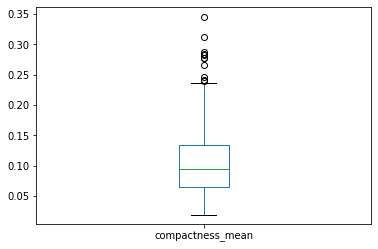

In [21]:
ds['compactness_mean'].plot.box()

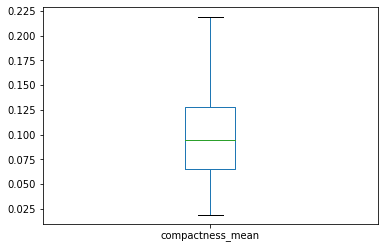

In [22]:
ds.loc[ds['compactness_mean']>0.22,'compactness_mean']=np.mean(ds['compactness_mean'])
ds['compactness_mean'].plot.box()

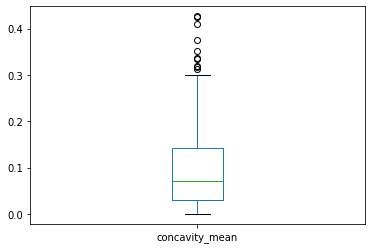

In [23]:
ds['concavity_mean'].plot.box()

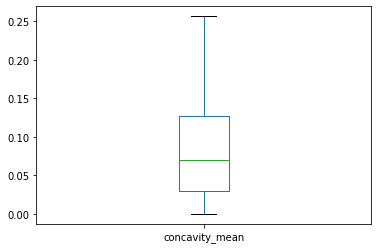

In [24]:
ds.loc[ds['concavity_mean']>0.27,'concavity_mean']=np.mean(ds['concavity_mean'])
ds['concavity_mean'].plot.box()

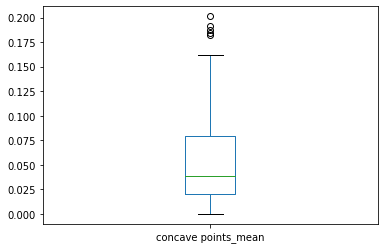

In [25]:
ds['concave points_mean'].plot.box()

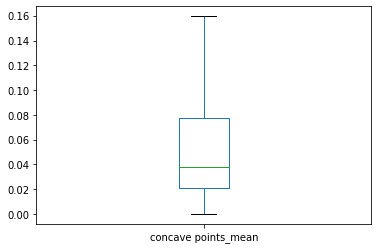

In [26]:
ds.loc[ds['concave points_mean']>0.160,'concave points_mean']=np.mean(ds['concave points_mean'])
ds['concave points_mean'].plot.box()

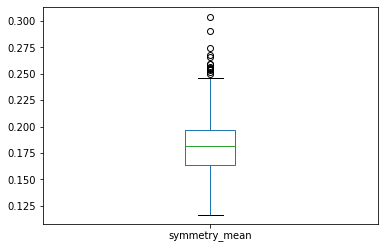

In [27]:
ds['symmetry_mean'].plot.box()

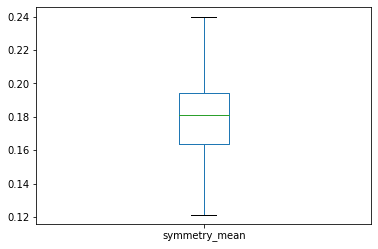

In [28]:
ds.loc[ds['symmetry_mean']>0.240,'symmetry_mean']=np.mean(ds['symmetry_mean'])
ds.loc[ds['symmetry_mean']<0.12,'symmetry_mean']=np.mean(ds['symmetry_mean'])

ds['symmetry_mean'].plot.box()

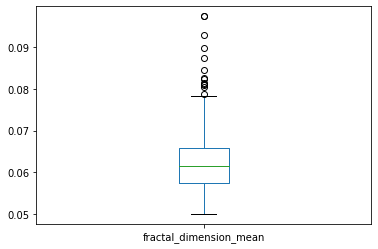

In [29]:
ds['fractal_dimension_mean'].plot.box()

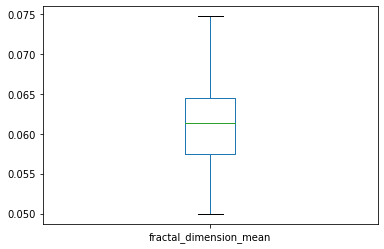

In [30]:
ds.loc[ds['fractal_dimension_mean']>0.075,'fractal_dimension_mean']=np.mean(ds['fractal_dimension_mean'])
ds['fractal_dimension_mean'].plot.box()

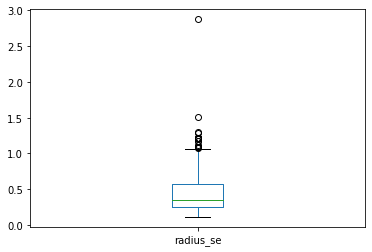

In [31]:
ds['radius_se'].plot.box()

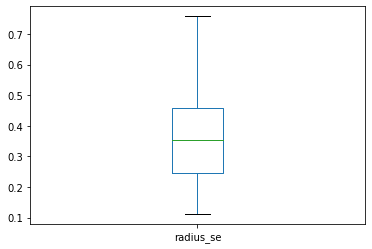

In [32]:
ds.loc[ds['radius_se']>0.76,'radius_se']=np.mean(ds['radius_se'])
ds['radius_se'].plot.box()

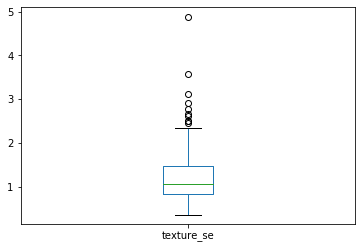

In [33]:
ds['texture_se'].plot.box()

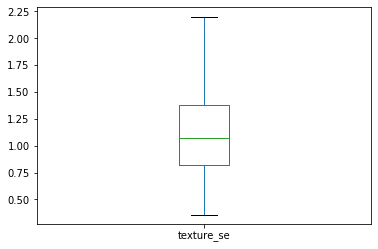

In [34]:
ds.loc[ds['texture_se']>2.2,'texture_se']=np.mean(ds['texture_se'])
ds['texture_se'].plot.box()

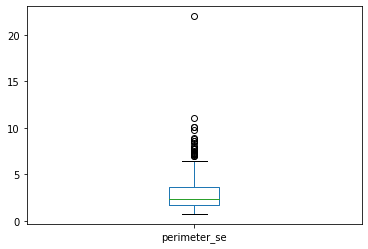

In [35]:
ds['perimeter_se'].plot.box()

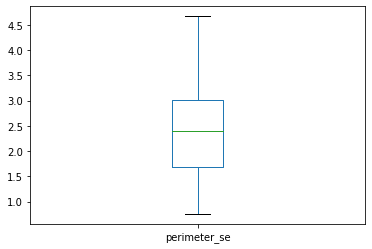

In [36]:
ds.loc[ds['perimeter_se']>4.7,'perimeter_se']=np.mean(ds['perimeter_se'])
ds['perimeter_se'].plot.box()

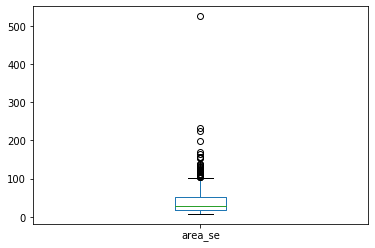

In [37]:
ds['area_se'].plot.box()

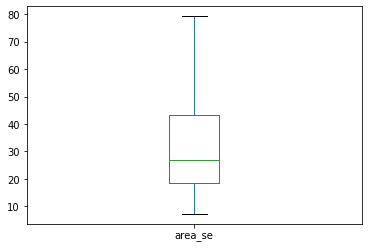

In [38]:
ds.loc[ds['area_se']>80,'area_se']=np.mean(ds['area_se'])
ds['area_se'].plot.box()

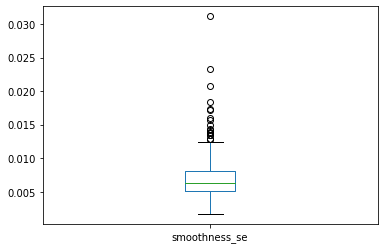

In [39]:
ds['smoothness_se'].plot.box()

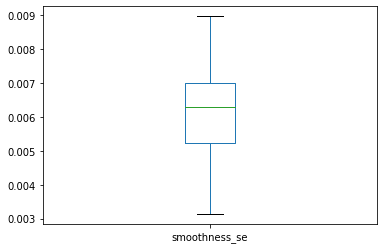

In [40]:
ds.loc[ds['smoothness_se']>0.009,'smoothness_se']=np.mean(ds['smoothness_se'])
ds.loc[ds['smoothness_se']<0.003,'smoothness_se']=np.mean(ds['smoothness_se'])
ds['smoothness_se'].plot.box()

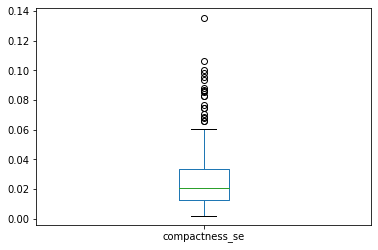

In [41]:
ds['compactness_se'].plot.box()

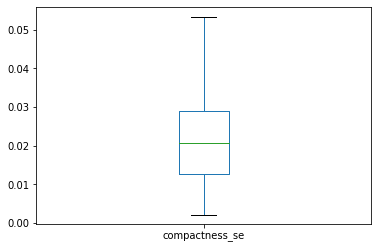

In [42]:
ds.loc[ds['compactness_se']>0.054,'compactness_se']=np.mean(ds['compactness_se'])
ds['compactness_se'].plot.box()

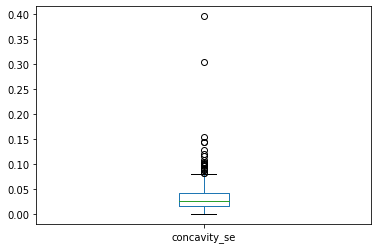

In [43]:
ds['concavity_se'].plot.box()

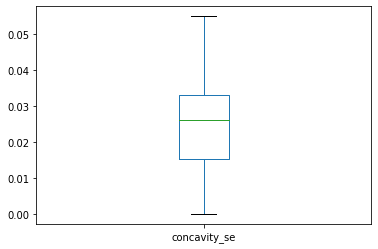

In [44]:
ds.loc[ds['concavity_se']>0.055,'concavity_se']=np.mean(ds['concavity_se'])
ds['concavity_se'].plot.box()

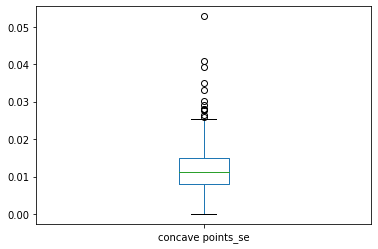

In [45]:
ds['concave points_se'].plot.box()

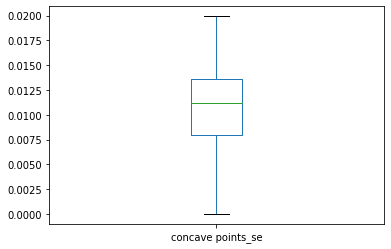

In [46]:
ds.loc[ds['concave points_se']>0.020,'concave points_se']=np.mean(ds['concave points_se'])
ds['concave points_se'].plot.box()

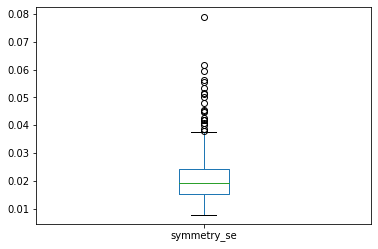

In [47]:
ds['symmetry_se'].plot.box()

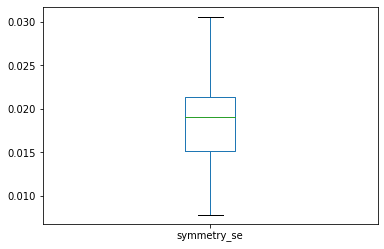

In [48]:
ds.loc[ds['symmetry_se']>0.0307,'symmetry_se']=np.mean(ds['symmetry_se'])
ds['symmetry_se'].plot.box()

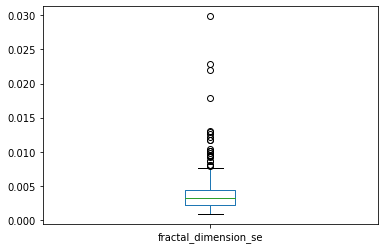

In [49]:
ds['fractal_dimension_se'].plot.box()

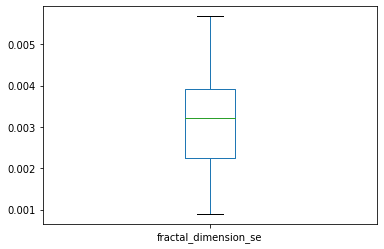

In [50]:
ds.loc[ds['fractal_dimension_se']>0.0057,'fractal_dimension_se']=np.mean(ds['fractal_dimension_se'])
ds['fractal_dimension_se'].plot.box()

In [51]:
ds.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

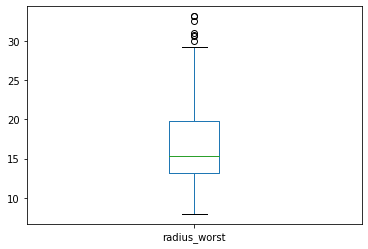

In [52]:
ds['radius_worst'].plot.box()

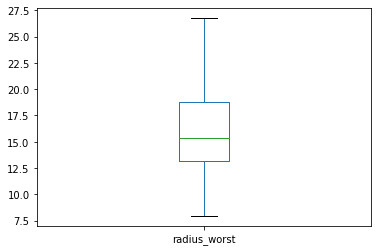

In [53]:
ds.loc[ds['radius_worst']>27,'radius_worst']=np.mean(ds['radius_worst'])
ds['radius_worst'].plot.box()

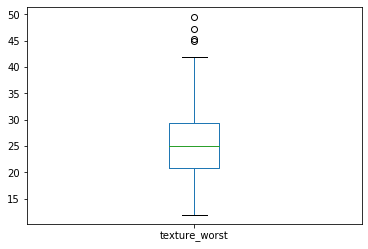

In [54]:
ds['texture_worst'].plot.box()

df.loc[ds['radius_mean']>23,'price']=np.mean(ds['price'])

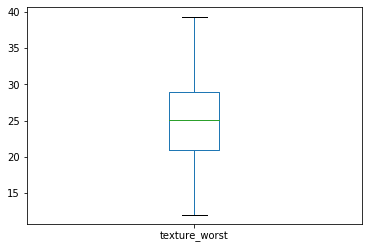

In [55]:
ds.loc[ds['texture_worst']>40,'texture_worst']=np.mean(ds['texture_worst'])
ds['texture_worst'].plot.box()

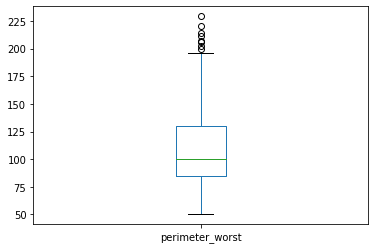

In [56]:
ds['perimeter_worst'].plot.box()

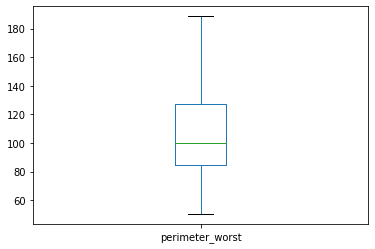

In [57]:
ds.loc[ds['perimeter_worst']>190,'perimeter_worst']=np.mean(ds['perimeter_worst'])
ds['perimeter_worst'].plot.box()

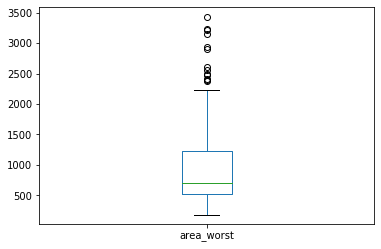

In [58]:
ds['area_worst'].plot.box()

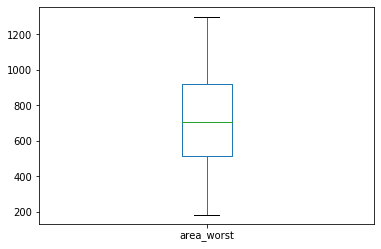

In [59]:
ds.loc[ds['area_worst']>1300,'area_worst']=np.mean(ds['area_worst'])
ds['area_worst'].plot.box()

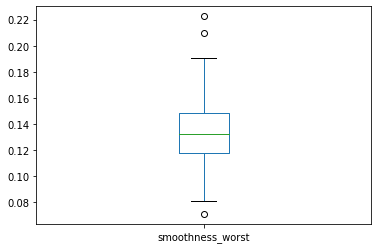

In [60]:
ds['smoothness_worst'].plot.box()

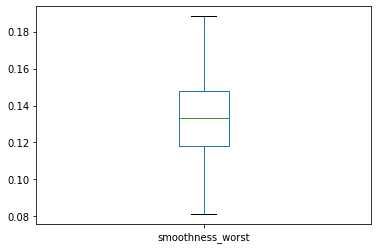

In [61]:
ds.loc[ds['smoothness_worst']>0.19,'smoothness_worst']=np.mean(ds['smoothness_worst'])
ds.loc[ds['smoothness_worst']<0.08,'smoothness_worst']=np.mean(ds['smoothness_worst'])
ds['smoothness_worst'].plot.box()

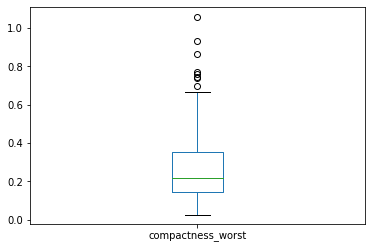

In [62]:
ds['compactness_worst'].plot.box()

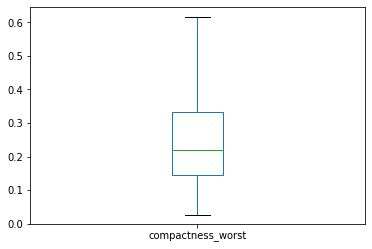

In [63]:
ds.loc[ds['compactness_worst']>0.62,'compactness_worst']=np.mean(ds['compactness_worst'])
ds['compactness_worst'].plot.box()

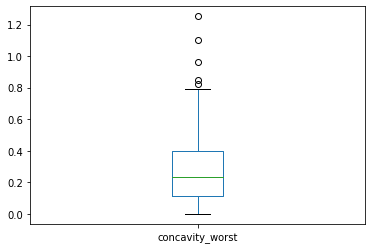

In [64]:
ds['concavity_worst'].plot.box()

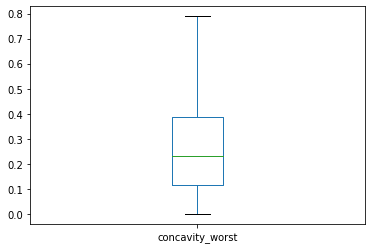

In [65]:
ds.loc[ds['concavity_worst']>0.8,'concavity_worst']=np.mean(ds['concavity_worst'])
ds['concavity_worst'].plot.box()

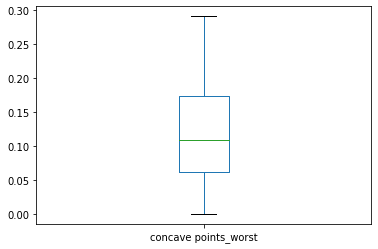

In [66]:
ds['concave points_worst'].plot.box()

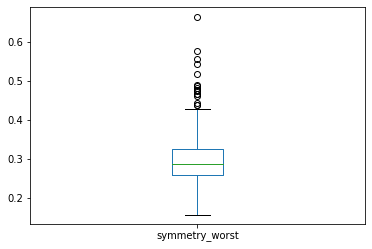

In [67]:
ds['symmetry_worst'].plot.box()

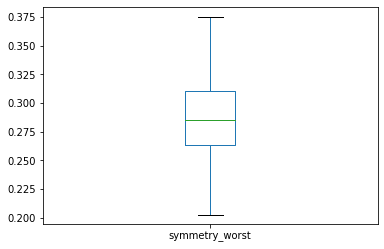

In [68]:
ds.loc[ds['symmetry_worst']>0.3751,'symmetry_worst']=np.mean(ds['symmetry_worst'])
ds.loc[ds['symmetry_worst']<0.20,'symmetry_worst']=np.mean(ds['symmetry_worst'])
ds['symmetry_worst'].plot.box()

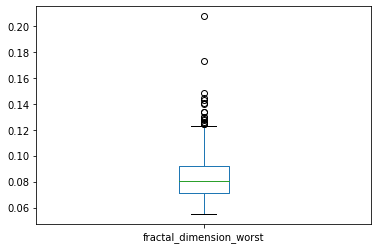

In [69]:
ds['fractal_dimension_worst'].plot.box()

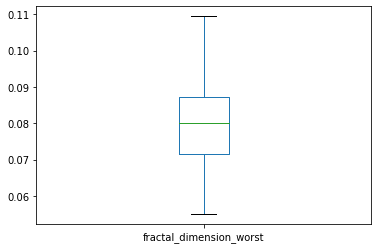

In [70]:
ds.loc[ds['fractal_dimension_worst']>0.11,'fractal_dimension_worst']=np.mean(ds['fractal_dimension_worst'])
ds['fractal_dimension_worst'].plot.box()

In [71]:
ds.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,...,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.445623,14.146100,18.888254,93.836472,553.133126,0.096528,0.099622,0.085563,0.050161,0.180257,...,16.196581,24.990722,107.607459,721.988612,0.133155,0.244987,0.270139,0.119263,0.287609,0.080742
std,0.497695,3.203637,3.700647,24.865873,156.790865,0.012717,0.043776,0.065838,0.035968,0.022975,...,4.240722,5.500399,30.757083,258.053129,0.021888,0.134771,0.193517,0.068215,0.037463,0.012014
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.121500,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.027290,0.000000,0.000000,0.202700,0.055040
25%,0.000000,11.840000,16.020000,76.090000,431.100000,0.087570,0.064920,0.030000,0.020690,0.163800,...,13.140000,20.880000,84.480000,515.900000,0.117900,0.144000,0.114400,0.062030,0.263600,0.071470
50%,0.000000,13.560000,18.840000,87.460000,566.200000,0.096990,0.095090,0.070700,0.038210,0.181300,...,15.340000,25.090000,100.300000,708.800000,0.132991,0.218600,0.232200,0.108700,0.285300,0.080200
75%,1.000000,16.110000,21.600000,109.000000,680.749867,0.105400,0.128300,0.127200,0.077520,0.194300,...,18.790000,29.020000,127.100000,921.164191,0.147800,0.333100,0.387900,0.173200,0.310500,0.087180
max,1.000000,22.270000,27.850000,188.500000,899.300000,0.129100,0.219000,0.256500,0.159500,0.239800,...,26.730000,39.340000,188.500000,1299.000000,0.188300,0.616400,0.789200,0.291000,0.375100,0.109400


In [72]:
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,680.749867,0.118400,0.106592,0.095205,0.14710,0.183374,...,25.38,17.33,184.60,921.164191,0.162200,0.262059,0.7119,0.2654,0.29766,0.084542
1,1,20.57,17.77,132.90,680.749867,0.084740,0.078640,0.086900,0.07017,0.181200,...,24.99,23.41,158.80,921.164191,0.123800,0.186600,0.2416,0.1860,0.27500,0.089020
2,1,19.69,21.25,130.00,680.749867,0.109600,0.159900,0.197400,0.12790,0.206900,...,23.57,25.53,152.50,921.164191,0.144400,0.424500,0.4504,0.2430,0.36130,0.087580
3,1,11.42,20.38,77.58,386.100000,0.097289,0.106592,0.241400,0.10520,0.183374,...,14.91,26.50,98.87,567.700000,0.133581,0.262059,0.6869,0.2575,0.29766,0.084542
4,1,20.29,14.34,135.10,680.749867,0.097289,0.132800,0.198000,0.10430,0.180900,...,22.54,16.67,152.20,921.164191,0.137400,0.205000,0.4000,0.1625,0.23640,0.076780


In [73]:
X = ds.iloc[:377,0:30]
y = ds.iloc[:377,[0]]

In [74]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [75]:
ds.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
X_train = scaler.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = scaler2.fit_transform(y)

X_train.shape

y_train.shape

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=101, stratify=y)

In [79]:
X_train.shape,y_train.shape

((301, 30), (301, 1))

In [80]:
X_train.shape[1]

30

In [81]:
classifier = Sequential()

In [82]:
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))

In [83]:
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

In [84]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [85]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
301/301 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.8073
Epoch 2/100
301/301 [==============================] - 0s 123us/step - loss: 0.6778 - accuracy: 0.9502
Epoch 3/100
301/301 [==============================] - 0s 192us/step - loss: 0.6281 - accuracy: 0.9269
Epoch 4/100
301/301 [==============================] - 0s 153us/step - loss: 0.5299 - accuracy: 0.9236
Epoch 5/100
301/301 [==============================] - 0s 192us/step - loss: 0.3934 - accuracy: 0.9568
Epoch 6/100
301/301 [==============================] - 0s 172us/step - loss: 0.2600 - accuracy: 0.9867
Epoch 7/100
301/301 [==============================] - 0s 212us/step - loss: 0.1678 - accuracy: 0.9900
Epoch 8/100
301/301 [==============================] - 0s 192us/step - loss: 0.1106 - accuracy: 0.9934
Epoch 9/100
301/301 [==============================] - 0s 133us/step - loss: 0.0791 - accuracy: 0.9967
Epoch 10/100
301/301 [==============================] - 0s 139us/step - los

301/301 [==============================] - 0s 162us/step - loss: 2.8724e-04 - accuracy: 1.0000
Epoch 79/100
301/301 [==============================] - 0s 162us/step - loss: 2.7736e-04 - accuracy: 1.0000
Epoch 80/100
301/301 [==============================] - 0s 235us/step - loss: 2.6855e-04 - accuracy: 1.0000
Epoch 81/100
301/301 [==============================] - 0s 225us/step - loss: 2.6056e-04 - accuracy: 1.0000
Epoch 82/100
301/301 [==============================] - 0s 189us/step - loss: 2.5262e-04 - accuracy: 1.0000
Epoch 83/100
301/301 [==============================] - 0s 213us/step - loss: 2.4403e-04 - accuracy: 1.0000
Epoch 84/100
301/301 [==============================] - 0s 205us/step - loss: 2.3744e-04 - accuracy: 1.0000
Epoch 85/100
301/301 [==============================] - 0s 232us/step - loss: 2.3102e-04 - accuracy: 1.0000
Epoch 86/100
301/301 [==============================] - 0s 232us/step - loss: 2.2339e-04 - accuracy: 1.0000
Epoch 87/100
301/301 [===================

In [87]:
y_pred = classifier.predict(X_test)
y_pred

array([[2.49207340e-04],
       [9.99999404e-01],
       [9.99977469e-01],
       [2.58189029e-05],
       [9.99989033e-01],
       [7.54953871e-05],
       [9.96317625e-01],
       [4.15923350e-05],
       [9.99997258e-01],
       [1.17331350e-04],
       [1.59375035e-04],
       [2.57069914e-04],
       [9.99989390e-01],
       [1.66067166e-05],
       [9.99999881e-01],
       [9.99148488e-01],
       [5.49227298e-05],
       [1.01683640e-04],
       [3.12820339e-04],
       [3.72721988e-05],
       [2.12085448e-04],
       [9.99671340e-01],
       [1.60533109e-05],
       [9.99999046e-01],
       [6.39135658e-04],
       [6.28182970e-05],
       [9.99993563e-01],
       [4.28379026e-05],
       [9.99994397e-01],
       [3.14956342e-05],
       [9.99125768e-06],
       [4.47396123e-05],
       [1.80780044e-04],
       [9.99995112e-01],
       [9.99394536e-01],
       [9.99993324e-01],
       [2.90541120e-05],
       [1.08535305e-05],
       [2.11219067e-05],
       [9.99881029e-01],


### - Numerical values are there due to activation function uses weighted value and then the calculation is performed.

In [88]:
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  0]
 [ 0 34]]


In [90]:
print("Accuracy = ",accuracy_score(y_test,y_pred))

print("Auc = ",roc_auc_score(y_test,y_pred))

Accuracy =  1.0
Auc =  1.0


In [91]:
ds1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9013579,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
1,9013594,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
2,9013838,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030
3,901549,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,901836,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [92]:
ds1.drop(["id"],axis=1,inplace=True)
ds1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
1,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
2,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030
3,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [93]:
ds1_null=ds1.columns[ds1.isnull().any()]
ds1[ds1_null].isnull().sum()

Series([], dtype: float64)

In [94]:
ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
ds.shape

(377, 31)

In [96]:
ds1.shape

(192, 30)

In [97]:
X = ds.iloc[:377,0:30]
y = ds.iloc[:377,[0]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
X_train = scaler.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = scaler2.fit_transform(y)

In [98]:
X_train.shape,y_train.shape

((377, 30), (377, 1))

In [99]:
A = ds1.iloc[:192,0:30]

In [100]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(A)

In [101]:
X_test.shape

(192, 30)

In [102]:
X_pred=classifier.predict(X_test)

In [103]:
X_pred

array([[2.92283744e-01],
       [3.76346588e-01],
       [7.75463581e-01],
       [3.45193893e-01],
       [3.06780964e-01],
       [2.26016878e-03],
       [3.13973054e-02],
       [2.76401162e-01],
       [8.64840090e-01],
       [3.82606462e-02],
       [2.46665090e-01],
       [8.58821208e-04],
       [9.98806715e-01],
       [3.90278660e-02],
       [9.79945157e-03],
       [9.70513225e-01],
       [9.99975443e-01],
       [6.13245547e-01],
       [7.89480686e-01],
       [7.72312939e-01],
       [4.90125455e-02],
       [2.18569245e-02],
       [1.32956073e-01],
       [9.97713685e-01],
       [2.28639960e-01],
       [1.69167802e-01],
       [3.44783306e-01],
       [9.27175805e-02],
       [3.94407474e-02],
       [9.35589194e-01],
       [7.22097466e-03],
       [9.98017073e-01],
       [6.22733653e-01],
       [3.68091643e-01],
       [1.38500780e-01],
       [1.60742621e-03],
       [8.54102433e-01],
       [8.91530335e-01],
       [4.17071372e-01],
       [1.21441841e-01],


In [104]:
temp=X_pred.reshape(-1,1)
temp=scaler2.inverse_transform(temp)
temp = (temp > 0.5)
print(temp)

[[False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 

In [105]:
y=pd.DataFrame(temp)
y[0]=y[0].replace({False: 0, True: 1})
y

,0
0,0
1,0
2,1
3,0
4,0
...,...
187,1
188,1
189,1
190,1


In [106]:
y.rename(columns = {0:'diagnosis'}, inplace = True) 
y.head()

,diagnosis
0,0
1,0
2,1
3,0
4,0


In [107]:
ds2 = pd.read_csv("Test_Dataset-01.csv")
ds2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9013579,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
1,9013594,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
2,9013838,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030
3,901549,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,901836,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [108]:
testpplid=ds2.iloc[:,0].values
z=pd.DataFrame(testpplid)
z.rename(columns = {0:'id'}, inplace = True) 
z.head()

,id
0,9013579
1,9013594
2,9013838
3,901549
4,901836


In [109]:
y.isnull().sum()

diagnosis    0
dtype: int64

In [110]:
z.isnull().sum()

id    0
dtype: int64

In [111]:
frames= [z,y]

In [112]:
result = pd.concat(frames,axis=1)

In [113]:
result.isnull().sum()

id           0
diagnosis    0
dtype: int64

In [114]:
y.shape,z.shape

((192, 1), (192, 1))

In [115]:
result.to_csv('ANN_OUTPUT.csv')